In [2]:
import os
import trimesh

In [3]:
def get_meshes(room_id, current_dir = "/home/ajad/Desktop/codes/LISA"):
    unpreprocessed_dir = os.path.join(current_dir, "unpreprocessed-outputs")
    preprocessed_dir = os.path.join(current_dir, "preprocessed-outputs")
    unpreprocessed_room = os.path.join(unpreprocessed_dir, room_id)
    if os.path.exists(unpreprocessed_room):
        type_of_obj_unpreprocessed = "complete.obj"
        unpreprocessed_obj_path = os.path.join(unpreprocessed_room, type_of_obj_unpreprocessed)
        if os.path.exists(unpreprocessed_obj_path):
            unpreprocessed_mesh = trimesh.load(unpreprocessed_obj_path)
        else:
            unpreprocessed_mesh = None
    else:
        unpreprocessed_mesh = None
        
    preprocessed_room = os.path.join(preprocessed_dir, room_id)
    if os.path.exists(preprocessed_room):
        type_of_obj_preprocessed = "concatenated_mesh.obj"
        preprocessed_obj_path = os.path.join(preprocessed_room, type_of_obj_preprocessed)
        if os.path.exists(preprocessed_obj_path):
            preprocessed_mesh = trimesh.load(preprocessed_obj_path)
        else:
            preprocessed_mesh = None
    else:
        preprocessed_mesh = None
    
    return unpreprocessed_mesh, preprocessed_mesh

In [4]:
# Invalid scenes path
invalid_scenes_path = "/home/ajad/Desktop/codes/LISA/preprocessed-outputs/invalid_scene_ids.txt"

with open(invalid_scenes_path, "r") as f:
    invalid_scenes = f.readlines()

invalid_scene_ids_dict = {}
for scene in invalid_scenes:
    # 0a25c251-7c80-4808-b609-3d6fbae9efad__MasterBedroom-2888 -> customized wall\n
    scene_id = scene.split("__")[0]
    remaining_text = scene.split("__")[1]
    room_id = remaining_text.split(" -> ")[0]
    reason = remaining_text.split(" -> ")[1].replace("\n", "")

    if scene_id not in invalid_scene_ids_dict:
        invalid_scene_ids_dict[scene_id] = [{"room_id" : room_id, "reason" : reason}]
    else:
        invalid_scene_ids_dict[scene_id].append({"room_id" : room_id, "reason" : reason})
print(invalid_scene_ids_dict)

print(len(invalid_scene_ids_dict))

{'0a25c251-7c80-4808-b609-3d6fbae9efad': [{'room_id': 'MasterBedroom-2888', 'reason': 'customized wall'}], '0a482eb4-e8fa-4b44-90d0-3623e0a60c71': [{'room_id': 'LivingDiningRoom-515', 'reason': 'customized wall'}], '0a8d471a-2587-458a-9214-586e003e9cf9': [{'room_id': 'LivingDiningRoom-4017', 'reason': 'fragments in the wall'}, {'room_id': 'Hallway-1213', 'reason': 'fragments in the wall'}], '0a9f5311-49e1-414c-ba7b-b42a171459a3': [{'room_id': 'LivingDiningRoom-18612', 'reason': 'customized wall'}, {'room_id': 'LivingDiningRoom-18612', 'reason': 'no sufficient walls, only 1 walls'}, {'room_id': 'MasterBedroom-18487', 'reason': 'customized wall'}], '0aa95eb8-4c86-4696-8022-7708bab5448e': [{'room_id': 'MasterBedroom-9164', 'reason': 'wall-furniture collision...'}, {'room_id': 'MasterBedroom-9164', 'reason': 'furniture-furniture collision...'}], '17ebf486-2858-4fdd-8cf8-92779089a6ae': [{'room_id': 'LivingRoom-35298', 'reason': 'no sufficient walls, only 1 walls'}, {'room_id': 'LivingRoom-3

In [5]:
# Invalid scenes path
valid_scenes_path = "/home/ajad/Desktop/codes/LISA/preprocessed-outputs/valid_scene_ids.txt"

with open(valid_scenes_path, "r") as f:
    valid_scenes = f.readlines()

valid_scene_ids_dict = {}
for scene in valid_scenes:
    # 0a25c251-7c80-4808-b609-3d6fbae9efad__MasterBedroom-2888 -> customized wall\n
    scene_id = scene.split("__")[0]
    room_id = scene.split("__")[1].replace("\n", "")
    # print(scene_id, room_id)
    # break

    if scene_id not in valid_scene_ids_dict:
        valid_scene_ids_dict[scene_id] = [{"room_id" : room_id}]
    else:
        valid_scene_ids_dict[scene_id].append({"room_id" : room_id})
print(valid_scene_ids_dict)
print(len(valid_scene_ids_dict))

{'0a17c68b-b74d-4d81-afe4-bc2ed405f0ec': [{'room_id': 'StorageRoom-4951'}, {'room_id': 'Bedroom-527'}], '0a25c251-7c80-4808-b609-3d6fbae9efad': [{'room_id': 'SecondBedroom-60495'}], '0a482eb4-e8fa-4b44-90d0-3623e0a60c71': [{'room_id': 'MasterBedroom-4593'}], '0a71be67-5024-4b9c-a53f-da0aaa294963': [{'room_id': 'SecondBedroom-26881'}, {'room_id': 'MasterBedroom-29735'}, {'room_id': 'LivingDiningRoom-29716'}], '0a8d471a-2587-458a-9214-586e003e9cf9': [{'room_id': 'Library-1772'}], '0a9c667d-033d-448c-b17c-dc55e6d3c386': [{'room_id': 'DiningRoom-11628'}, {'room_id': 'MasterBedroom-8583'}, {'room_id': 'LivingRoom-11555'}, {'room_id': 'SecondBedroom-5159'}], '0a9f5311-49e1-414c-ba7b-b42a171459a3': [{'room_id': 'SecondBedroom-18509'}], '0aa95eb8-4c86-4696-8022-7708bab5448e': [{'room_id': 'Bedroom-9202'}], '17ebf486-2858-4fdd-8cf8-92779089a6ae': [{'room_id': 'LivingRoom-34816'}, {'room_id': 'Bedroom-34900'}, {'room_id': 'Lounge-35381'}], '1d4185fd-6736-4441-9bf8-f653312d7a3b': [{'room_id': 'Ma

In [6]:
unpreprocessed_meshes_invalid = []
preprocessed_meshes_invalid = []
unpreprocessed_meshes_valid = []
preprocessed_meshes_valid = []
for invalid_scene_id in invalid_scene_ids_dict:
    for room_info in invalid_scene_ids_dict[invalid_scene_id]:
        room_id = room_info["room_id"]
        reason = room_info["reason"]
        unpreprocessed_mesh, preprocessed_mesh = get_meshes(room_id)
        unpreprocessed_meshes_invalid.append({room_id : unpreprocessed_mesh, "reason" : reason})
        preprocessed_meshes_invalid.append({room_id : preprocessed_mesh, "reason" : reason})

for valid_scene_id in valid_scene_ids_dict:
    for room_info in valid_scene_ids_dict[valid_scene_id]:
        room_id = room_info["room_id"]
        unpreprocessed_mesh, preprocessed_mesh = get_meshes(room_id)
        unpreprocessed_meshes_valid.append({room_id : unpreprocessed_mesh})
        preprocessed_meshes_valid.append({room_id : preprocessed_mesh})

print(len(unpreprocessed_meshes_invalid))
print(len(preprocessed_meshes_invalid))
print(len(unpreprocessed_meshes_valid))
print(len(preprocessed_meshes_valid))
        

22
22
26
26


In [8]:
# Visualize mesh as an image with title as room id and reason
import trimesh
import matplotlib.pyplot as plt

def visualize_mesh(mesh, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the mesh vertices and faces
    ax.plot_trisurf(mesh.vertices[:, 0], 
                    mesh.vertices[:, 1], 
                    mesh.vertices[:, 2],
                    triangles=mesh.faces,
                    alpha=0.8,
                    edgecolor='black',
                    linewidth=0.1)
    
    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title, fontsize=12, pad=20)
    
    # Set equal aspect ratio
    ax.set_box_aspect([1, 1, 1])
    
    plt.tight_layout()
    plt.show()

index = 4
# room_id = list(unpreprocessed_meshes_invalid[index].keys())[0]
# mesh = list(unpreprocessed_meshes_invalid[index].values())[0]
# reason = list(unpreprocessed_meshes_invalid[index].values())[1]
# print(room_id, reason)
# mesh.show()
# visualize_mesh(mesh, room_id + " " + reason)

room_id = list(unpreprocessed_meshes_valid[index].keys())[0]
mesh_unpreprocessed = list(unpreprocessed_meshes_valid[index].values())[0]
mesh_preprocessed = list(preprocessed_meshes_valid[index].values())[0]
# mesh_unpreprocessed.show(title=room_id)
mesh_preprocessed.show(title=room_id)

In [7]:
unpreprocessed_mesh, preprocessed_mesh = get_meshes("MasterBedroom-59217")

preprocessed_mesh.show()

In [21]:
# obj_path = "/home/ajad/Desktop/codes/LISA/unpreprocessed-outputs/MasterBedroom-9164/furniture.obj"
mesh = trimesh.load("/home/ajad/Desktop/codes/LISA/unpreprocessed-outputs/MasterBedroom-9164/walls.obj")
mesh.show()

NO OVERLAP
Overlap Status: NO OVERLAP
The bounding boxes are not overlapping.


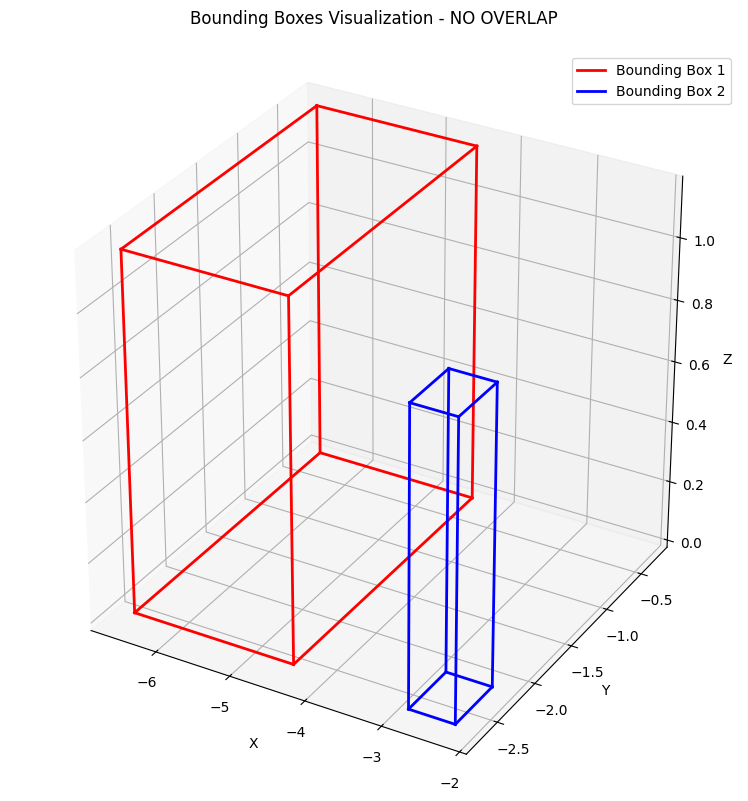

In [96]:
# visualize bounding boxes using matoplotlib
bbox_1= [
    [-4.41433730e+00, -2.91239547e-01, 1.16882000e+00],
    [-6.57813730e+00, -2.65265955e+00, -2.61657000e-04]
]
bbox_2 = [
    [-2.83168688, -2.72396598, 0.        ],
    [-2.23109988, -2.24271398, 0.97      ]
]

# visualize bounding boxes using matoplotlib
import matplotlib.pyplot as plt
import numpy as np

min_1, max_1 = bbox_1
min_2, max_2 = bbox_2

# Check for overlap
def check_overlap(bbox1, bbox2):
    a1, b1 = bbox1
    a2, b2 = bbox2
    xmin1, ymin1, zmin1 = min1
    xmax1, ymax1, zmax1 = max1
    xmin2, ymin2, zmin2 = min2
    xmax2, ymax2, zmax2 = max2

    
    # Check if boxes overlap in all dimensions
    overlap_x =  (max1[0] >=  min2[0] and  max2[0] >= min1[0])
    overlap_y =  (max1[1] >=  min2[1] and  max2[1] >= min1[1])
    overlap_z =  (max1[2] >=  min2[2] and  max2[2] >= min1[2])
    
    return overlap_x and overlap_y and overlap_z

def check_bbox_overlap(bbox_1, bbox_2):
    """
    Check if two 3D bounding boxes overlap.
    
    Args:
        bbox_1: List/array of 2 points [[x1,y1,z1], [x2,y2,z2]]
        bbox_2: List/array of 2 points [[x1,y1,z1], [x2,y2,z2]]
        
    Returns:
        bool: True if bounding boxes overlap, False otherwise
    """
    # Convert to numpy arrays for easier manipulation
    bbox_1 = np.array(bbox_1)
    bbox_2 = np.array(bbox_2)
    
    # Find min and max coordinates for each dimension for both bounding boxes
    bbox_1_min = np.minimum(bbox_1[0], bbox_1[1])
    bbox_1_max = np.maximum(bbox_1[0], bbox_1[1])
    
    bbox_2_min = np.minimum(bbox_2[0], bbox_2[1])
    bbox_2_max = np.maximum(bbox_2[0], bbox_2[1])
    
    # Check overlap in each dimension
    # For overlap to occur, the maximum of the minimums must be less than or equal to
    # the minimum of the maximums in ALL dimensions
    overlap_min = np.maximum(bbox_1_min, bbox_2_min)
    overlap_max = np.minimum(bbox_1_max, bbox_2_max)
    
    # Check if overlap exists in all dimensions
    overlap = np.all(overlap_min <= overlap_max)
    
    return overlap

# is_overlapping = check_overlap(bbox_1, bbox_2)
is_overlapping = check_bbox_overlap(bbox_1, bbox_2)
overlap_status = "OVERLAPPING" if is_overlapping else "NO OVERLAP"
print(overlap_status)

# Visualize
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create bounding box 1
x1_min, y1_min, z1_min = min_1
x1_max, y1_max, z1_max = max_1

# Create bounding box 2  
x2_min, y2_min, z2_min = min_2
x2_max, y2_max, z2_max = max_2

# Plot bounding box 1 (red)
ax.plot([x1_min, x1_max], [y1_min, y1_min], [z1_min, z1_min], 'r-', linewidth=2)
ax.plot([x1_min, x1_max], [y1_max, y1_max], [z1_min, z1_min], 'r-', linewidth=2)
ax.plot([x1_min, x1_min], [y1_min, y1_max], [z1_min, z1_min], 'r-', linewidth=2)
ax.plot([x1_max, x1_max], [y1_min, y1_max], [z1_min, z1_min], 'r-', linewidth=2)

ax.plot([x1_min, x1_max], [y1_min, y1_min], [z1_max, z1_max], 'r-', linewidth=2)
ax.plot([x1_min, x1_max], [y1_max, y1_max], [z1_max, z1_max], 'r-', linewidth=2)
ax.plot([x1_min, x1_min], [y1_min, y1_max], [z1_max, z1_max], 'r-', linewidth=2)
ax.plot([x1_max, x1_max], [y1_min, y1_max], [z1_max, z1_max], 'r-', linewidth=2)

ax.plot([x1_min, x1_min], [y1_min, y1_min], [z1_min, z1_max], 'r-', linewidth=2)
ax.plot([x1_max, x1_max], [y1_min, y1_min], [z1_min, z1_max], 'r-', linewidth=2)
ax.plot([x1_max, x1_max], [y1_max, y1_max], [z1_min, z1_max], 'r-', linewidth=2)
ax.plot([x1_min, x1_min], [y1_max, y1_max], [z1_min, z1_max], 'r-', linewidth=2)

# Plot bounding box 2 (blue)
ax.plot([x2_min, x2_max], [y2_min, y2_min], [z2_min, z2_min], 'b-', linewidth=2)
ax.plot([x2_min, x2_max], [y2_max, y2_max], [z2_min, z2_min], 'b-', linewidth=2)
ax.plot([x2_min, x2_min], [y2_min, y2_max], [z2_min, z2_min], 'b-', linewidth=2)
ax.plot([x2_max, x2_max], [y2_min, y2_max], [z2_min, z2_min], 'b-', linewidth=2)

ax.plot([x2_min, x2_max], [y2_min, y2_min], [z2_max, z2_max], 'b-', linewidth=2)
ax.plot([x2_min, x2_max], [y2_max, y2_max], [z2_max, z2_max], 'b-', linewidth=2)
ax.plot([x2_min, x2_min], [y2_min, y2_max], [z2_max, z2_max], 'b-', linewidth=2)
ax.plot([x2_max, x2_max], [y2_min, y2_max], [z2_max, z2_max], 'b-', linewidth=2)

ax.plot([x2_min, x2_min], [y2_min, y2_min], [z2_min, z2_max], 'b-', linewidth=2)
ax.plot([x2_max, x2_max], [y2_min, y2_min], [z2_min, z2_max], 'b-', linewidth=2)
ax.plot([x2_max, x2_max], [y2_max, y2_max], [z2_min, z2_max], 'b-', linewidth=2)
ax.plot([x2_min, x2_min], [y2_max, y2_max], [z2_min, z2_max], 'b-', linewidth=2)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y') 
ax.set_zlabel('Z')
ax.set_title(f'Bounding Boxes Visualization - {overlap_status}', fontsize=12, pad=20)

# Set equal aspect ratio
ax.set_box_aspect([1, 1, 1])

# Add legend
ax.plot([], [], 'r-', linewidth=2, label='Bounding Box 1')
ax.plot([], [], 'b-', linewidth=2, label='Bounding Box 2')
ax.legend()

# Print overlap information
print(f"Overlap Status: {overlap_status}")
if is_overlapping:
    print("The bounding boxes are overlapping!")
else:
    print("The bounding boxes are not overlapping.")

plt.tight_layout()
plt.show()
